In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframe
path = r'C:\Users\bruna\Career Foundry\08-2023 Instacart Basket Analysis'

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,nr_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both


## 1. Analysis of spending habits

### 1.1 Creating a new column with US Region

In [5]:
#Creating a column with US Region
result = []
for value in ords_prods_all ['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    if value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    if value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    if value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append('West')

ords_prods_all['region'] = result

In [6]:
#Viewing results
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,nr_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both,South


In [7]:
#Running value.counts to confirm accuracy
ords_prods_all['region'].value_counts(dropna = False) #no NaN values

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [8]:
ords_prods_all['region'].shape #total number of rows matching expected result

(32404859,)

### 1.2. Analysing the spending habits per US region

In [9]:
#Exporting a copy of ords_prods_all to visualise in excel
head = ords_prods_all.head(100)
head.to_clipboard()

In [10]:
#Creating a crosstab between the spending flag and the region columns, to assess spending habits per region
crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [11]:
crosstab.to_clipboard()

There is no difference in spending habits between regions. All 4 regions have 1.7 to 1.8% of high spenders vs 98.2 to 98.3% of low spenders

## 2. Excluding low-activity customers

In [12]:
#Creating a exclusion flag for low-activity customers (less than 5 orders)
ords_prods_all.loc[ords_prods_all['max_order']<5, 'cust_activity_flag'] = 'Low activity customer'
ords_prods_all.loc[ords_prods_all['max_order']>=5, 'cust_activity_flag'] = 'High activity customer'

In [13]:
#running value.counts to confirm accuracy
ords_prods_all['cust_activity_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: cust_activity_flag, dtype: int64

In [14]:
ords_prods_all['cust_activity_flag'].shape

(32404859,)

In [15]:
#creating high activity only dataframe
ords_prods_high_act_cust = ords_prods_all[ords_prods_all['cust_activity_flag'] == 'High activity customer']

In [16]:
#exporting dataframe
ords_prods_high_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_high_act_cust.pkl'))

In [33]:
#counting new number of customers (previously 206209) 
ords_prods_high_act_cust['user_id'].nunique()

162631

## 3. Customer profiling 

### 3.1 Demografic profiling - Age

In [17]:
#visualising age column data
ords_prods_high_act_cust['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Age labels: 'Young' <=35; 'Middle-aged' >35&<=65, 'Senior' >65

In [18]:
#adding column to dataframe with flag to the database with high activity customers only
result = []
for value in ords_prods_high_act_cust ['age']:
    if value <= 35:
        result.append('Young')
    if value >35 and value <= 65:
        result.append('Middle aged')
    if value >65:
        result.append('Senior')

In [19]:
#adding column to dataframe with flag to database with high activity customers only
ords_prods_high_act_cust['age_flag'] = result

C:\Users\bruna\AppData\Local\Temp\ipykernel_26680\2840470786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_high_act_cust['age_flag'] = result


In [20]:
#running value count and max to confirm if results make sense
ords_prods_high_act_cust['age_flag'].value_counts(dropna = False)

Middle aged    14494925
Young           8738805
Senior          7730834
Name: age_flag, dtype: int64

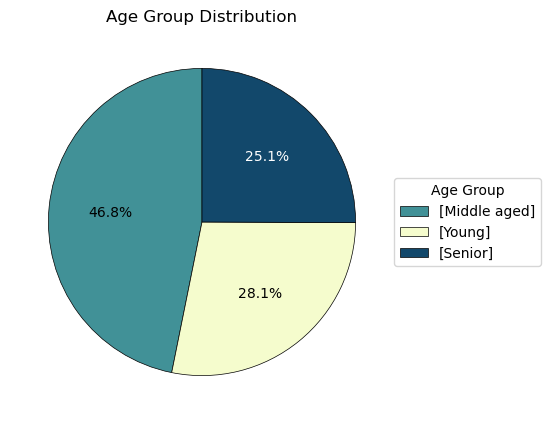

In [25]:
# Group by 'user_id' and get unique ages
age_counts_per_user = ords_prods_high_act_cust.groupby('user_id')['age_flag'].unique().value_counts()

# Plot the pie chart
age_pie = age_counts_per_user.plot.pie(startangle=90,
                                       autopct='%1.1f%%',
                                       colors=['#419197', '#F5FCCD', '#12486B'],
                                       labeldistance=None,
                                       wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

age_pie.texts[2].set_color('white')

plt.legend(loc = 'center right',
          bbox_to_anchor=(0.9, 0, 0.5, 1),
          title = 'Age Group')
plt.title('Age Group Distribution')
plt.ylabel(None) 

plt.subplots_adjust(left=0.1, right=0.7, top=0.9, bottom=0.1)

plt.show()

In [27]:
# confirming number of customers. Expected: 162631; Observed: 162631
age_counts_per_user

[Middle aged]    76173
[Young]          45689
[Senior]         40769
Name: age_flag, dtype: int64

In [36]:
#exporting the figure
age_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_pie.png'))

### 3.2 Demografic profiling - Income

In [37]:
#visualising income column data
ords_prods_high_act_cust['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

Income labels: 'Low income' <=67000; 'Average_income' >67000 & <=128000, 'High_income' >128000

In [38]:
#creating the income flag criteria
result = []
for value in ords_prods_high_act_cust ['income']:
    if value <= 67000:
        result.append('Low income')
    if value >67000 and value <= 128000:
        result.append('Average income')
    if value >128000:
        result.append('High income')

In [39]:
#adding column to dataframe with flag
ords_prods_high_act_cust['income_flag'] = result

C:\Users\bruna\AppData\Local\Temp\ipykernel_26680\3897377820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_high_act_cust['income_flag'] = result


In [40]:
#running value count and max to confirm if results make sense
ords_prods_high_act_cust['income_flag'].value_counts(dropna = False)

Average income    15549969
High income        7753117
Low income         7661478
Name: income_flag, dtype: int64

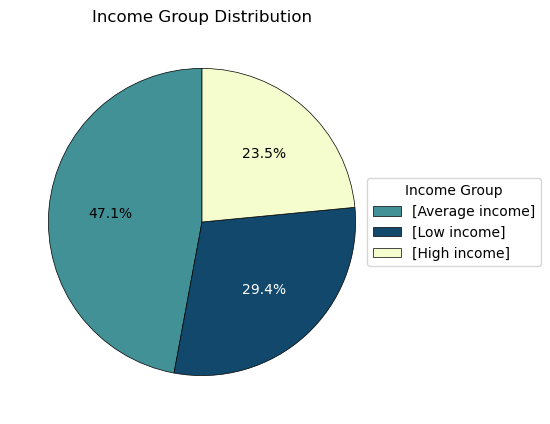

In [41]:
# Group by 'user_id' and get unique incomes
income_per_user = ords_prods_high_act_cust.groupby('user_id')['income_flag'].unique().value_counts()

# Plot a pie chart for the income distribution
income_pie = income_per_user.plot.pie(startangle = 90,
                                        autopct='%1.1f%%',
                                        colors = ['#419197','#12486B','#F5FCCD'],
                                        labeldistance = None,
                                        wedgeprops={'edgecolor':'black','linewidth':.5})


income_pie.texts[1].set_color('white')

plt.legend(loc = 'center right',
          bbox_to_anchor=(0.9, 0, 0.5, 1),
          title = 'Income Group')
plt.title('Income Group Distribution')
plt.ylabel(None) 

plt.subplots_adjust(left=0.1, right=0.7, top=0.9, bottom=0.1)

plt.show()

In [42]:
#exporting the figure
income_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_pie.png'))

### 3.3 Demografic profiling - family status, nr dependants, age

In [43]:
ords_prods_high_act_cust['fam_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

*category, age, fam_status, nr_dependant*

Young family: <35, married, >0

Mature family:	>=35, married, >0

Single parental family: -, single|divorced/widowed, >0

Empty nesters: >50, married , 0

Childless couples: <=50, married, 0

Childless singles: -, single|divorced/widowed, 0

Descendant with family: -, living with parents and siblings, >0


In [44]:
#creating the family demografic flag criteria
ords_prods_high_act_cust.loc[(ords_prods_high_act_cust['age']<35) & (ords_prods_high_act_cust['fam_status']=='married') & (ords_prods_high_act_cust['nr_dependants']>0), 'fam_demog_flag'] = 'Young family'
ords_prods_high_act_cust.loc[(ords_prods_high_act_cust['age']>=35) & (ords_prods_high_act_cust['fam_status']=='married') & (ords_prods_high_act_cust['nr_dependants']>0), 'fam_demog_flag'] = 'Mature family'
ords_prods_high_act_cust.loc[((ords_prods_high_act_cust['fam_status']=='single') | (ords_prods_high_act_cust['fam_status']=='divorced/widowed')) & (ords_prods_high_act_cust['nr_dependants']>0), 'fam_demog_flag'] = 'Single parental family'
ords_prods_high_act_cust.loc[(ords_prods_high_act_cust['age']>50) & (ords_prods_high_act_cust['fam_status']=='married') & (ords_prods_high_act_cust['nr_dependants']==0), 'fam_demog_flag'] = 'Empty nesters'
ords_prods_high_act_cust.loc[(ords_prods_high_act_cust['age']<=50) & (ords_prods_high_act_cust['fam_status']=='married') & (ords_prods_high_act_cust['nr_dependants']==0), 'fam_demog_flag'] = 'Childless couple'
ords_prods_high_act_cust.loc[((ords_prods_high_act_cust['fam_status']=='single') | (ords_prods_high_act_cust['fam_status']=='divorced/widowed')) & (ords_prods_high_act_cust['nr_dependants']==0), 'fam_demog_flag'] = 'Childless single'
ords_prods_high_act_cust.loc[(ords_prods_all['fam_status']=='living with parents and siblings') & (ords_prods_high_act_cust['nr_dependants']>0), 'fam_demog_flag'] = 'Descendant with family'

C:\Users\bruna\AppData\Local\Temp\ipykernel_26680\577652714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_high_act_cust.loc[(ords_prods_high_act_cust['age']<35) & (ords_prods_high_act_cust['fam_status']=='married') & (ords_prods_high_act_cust['nr_dependants']>0), 'fam_demog_flag'] = 'Young family'


In [45]:
#running value count and max to confirm if results make sense
ords_prods_high_act_cust['fam_demog_flag'].value_counts(dropna = False)

Mature family             17046146
Childless single           7739681
Young family               4697565
Descendant with family     1481172
Name: fam_demog_flag, dtype: int64

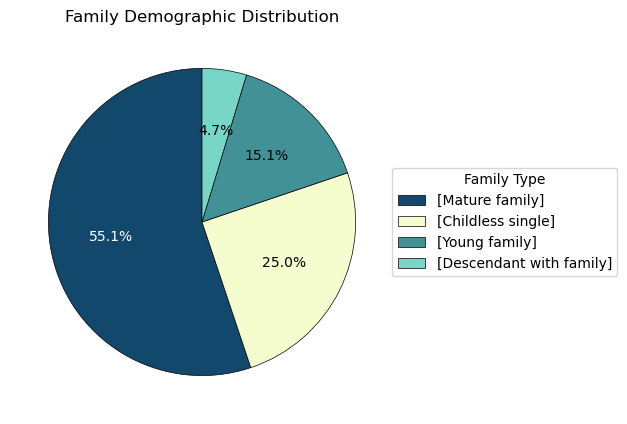

In [46]:
# Group by 'user_id' and get unique values
fam_demog_per_user = ords_prods_high_act_cust.groupby('user_id')['fam_demog_flag'].unique().value_counts()

# Plotting a pie chart for the fam_demographic distribution
fam_demog_pie = fam_demog_per_user.plot.pie(startangle = 90,
                                  autopct='%1.1f%%',
                                  colors = ['#12486B','#F5FCCD', '#419197','#78D6C6', '#053B50'],
                                  labeldistance = None,
                                  wedgeprops={'edgecolor':'black','linewidth':.5})


fam_demog_pie.texts[0].set_color('white')

plt.legend(loc = 'center right',
          bbox_to_anchor=(1.1, 0, 0.5, 1),
          title = 'Family Type')
plt.title('Family Demographic Distribution')
plt.ylabel(None) 

plt.subplots_adjust(left=0, right=0.6, top=0.9, bottom=0.1)

plt.show()

#exporting the figure
fam_demog_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fam_demog_pie.png'))

### 3.4 Demografic profiling - location

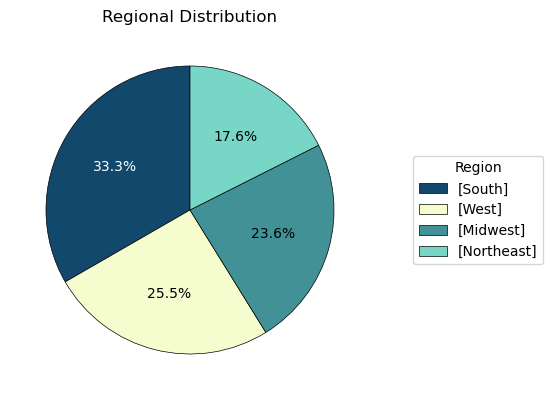

In [47]:
# Group by 'user_id' and get unique values
region_per_user = ords_prods_high_act_cust.groupby('user_id')['region'].unique().value_counts()

# Plotting a pie chart for the fam_demographic distribution
location_pie = region_per_user.plot.pie(startangle = 90,
                                 autopct='%1.1f%%',
                                 colors = ['#12486B','#F5FCCD', '#419197','#78D6C6', '#053B50'],
                                 labeldistance = None,
                                 wedgeprops={'edgecolor':'black','linewidth':.5})


location_pie.texts[0].set_color('white')

plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1),
          title = 'Region')
plt.title('Regional Distribution')
plt.ylabel(None) 

plt.subplots_adjust(left=0, right=0.7, top=0.85, bottom=0.1)

plt.show()

#exporting the figure
location_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'location_pie.png'))

In [48]:
#exporting dataframe
ords_prods_high_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_high_act_cust.pkl'))